In [11]:
!pwd

/data/work/ynakamura/git/qtransformer


In [27]:
import pennylane as qml
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

[0.42382812 0.39453125 0.19726562 0.26757812 0.50976562]


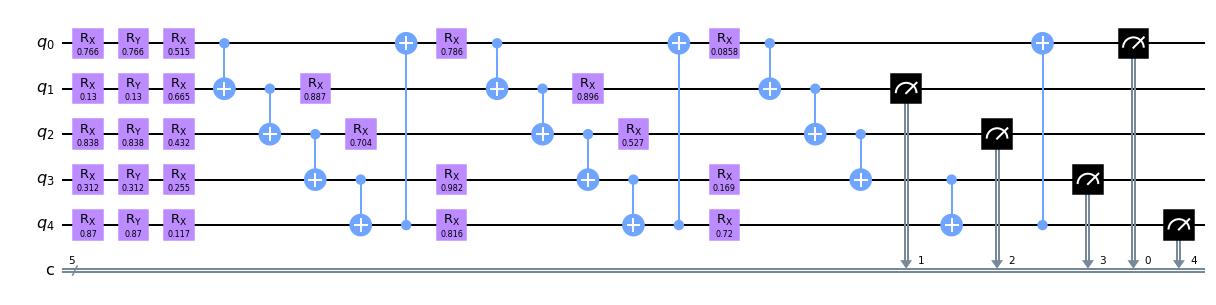

In [13]:
n_qubits = 5
inputs=np.random.rand(5)
weights = np.random.rand(3,n_qubits)

# print(qml.templates.AngleEmbedding(inputs, wires=range(n_qubits)))
# print(qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits)))

dev_2 = qml.device("qiskit.aer", wires=n_qubits)
@qml.qnode(dev_2)
def _circuit_draw(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits),rotation='X')
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits),rotation='Y')
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

print(_circuit_draw(inputs, weights)) 
dev_2._circuit.draw("mpl",fold=1)

## Execute Qtransformer

In [14]:

import torchtext
import torch
print(torch.__version__)
torchtext.__version__
# !cat /content/drive/MyDrive/QML/qtransformer/requirements.torch.txt

1.7.1


'0.8.0'

In [15]:
import qtransformer
import train_classifier

In [16]:
import sys

# sys.path.append("/content/drive/MyDrive/QML/qtransformer")

In [19]:
%%time
# !python train_classifier.py  -e 2 -q 2 -Q 1 # -D qulacs.simulator -a 1
!python train_classifier.py  -e 2 -q 2 -Q 1 -D qulacs.simulator -a 1

2021-05-23 11:28:53.779787: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
/opt/anaconda3/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: LabelField class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/opt/anaconda3/lib/python3.7/site-pac

In [26]:
%%time
!python train_classifier.py -D qiskit.aer

2021-05-23 11:45:21.488996: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
/opt/anaconda3/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: LabelField class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/opt/anaconda3/lib/python3.7/site-pac

In [10]:
%%time
!python train_classifier.py -D qulacs.simulator -a 2

2021-05-16 11:42:41.716854: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
usage: train_classifier.py [-h] [-D Q_DEVICE] [-B BATCH_SIZE] [-E N_EPOCHS]
                           [-C N_CLASSES] [-l LR] [-v VOCAB_SIZE]
                           [-e EMBED_DIM] [-s MAX_SEQ_LEN] [-f FFN_DIM]
                           [-t N_TRANSFORMER_BLOCKS] [-H N_HEADS]
                           [-q N_QUBITS_TRANSFORMER] [-Q N_QUBITS_FFN]
                           [-L N_QLAYERS] [-d DROPOUT_RATE]
train_classifier.py: error: unrecognized arguments: -a 2
CPU times: user 55.8 ms, sys: 36.2 ms, total: 92 ms
Wall time: 3 s


In [33]:
%%time
!python train_classifier_tf.py -v 2000

2021-05-23 11:59:26.276623: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-23 11:59:28.292603: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-23 11:59:28.323523: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-23 11:59:28.323557: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-23 11:59:28.325206: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-05-23 11:59:28.326827: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [34]:
%%time
!python train_classifier_tf.py -v 20000

2021-05-23 12:00:31.203416: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-23 12:00:33.295789: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-23 12:00:33.326891: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-23 12:00:33.326926: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-23 12:00:33.328673: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-05-23 12:00:33.330384: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

# eval calc time

In [32]:
!python train_classifier.py 

2021-05-23 11:57:51.595551: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
/opt/anaconda3/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: LabelField class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/opt/anaconda3/lib/python3.7/site-pac

In [31]:
%%time
# !python train_classifier.py 

CPU times: user 10 µs, sys: 6 µs, total: 16 µs
Wall time: 30.5 µs
2021-05-23 11:56:35.016109: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
/opt/anaconda3/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: LabelField class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__cla

In [ ]:
!python train_classifier_tf.py -e 2 -q 2 -Q 1 -D qulacs.simulator -a 1

2021-05-23 12:02:36.218676: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-23 12:02:38.377161: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-23 12:02:38.410694: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-23 12:02:38.410745: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-23 12:02:38.412510: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-05-23 12:02:38.414301: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [38]:
!grep "Training examples" *py

train_classifier.py:    print(f'Training examples: {len(train_data)}')


In [63]:
%%time
!python train_classifier_tf.py -m 1000

2021-05-30 10:54:13.750551: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-30 10:54:15.863828: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-30 10:54:15.932136: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-30 10:54:15.932172: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-30 10:54:15.934133: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-05-30 10:54:15.936010: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [64]:
%%time
!python train_classifier_tf.py -m 500

2021-05-30 10:56:15.935650: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-30 10:56:18.056620: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-30 10:56:18.285664: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-30 10:56:18.285729: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-30 10:56:18.287624: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-05-30 10:56:18.289568: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [66]:
%%time
!python train_classifier_tf.py -m 40

2021-05-30 10:58:56.961231: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-30 10:58:59.072223: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-30 10:58:59.105361: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-30 10:58:59.105411: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-30 10:58:59.107251: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-05-30 10:58:59.109306: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [67]:
%%time
!python train_classifier_tf.py -m 100

2021-05-30 11:05:28.310286: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-30 11:05:30.394064: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-05-30 11:05:30.428102: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-05-30 11:05:30.428137: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-05-30 11:05:30.429795: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-05-30 11:05:30.431696: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [130]:
import tensorflow as tf

maxlen = None
(train_data, train_labels), (test_data, test_labels) =\
        tf.keras.datasets.imdb.load_data(maxlen=maxlen)

print(f"args.vocab_size: {vocab_size}")
print(f'Training examples: {len(train_data)}')
print(f'Testing examples:  {len(test_data)}')

args.vocab_size: 15
Training examples: 25000
Testing examples:  25000


In [137]:
obj = tf.keras.datasets.imdb.load_data()

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [134]:
train_data
set(train_labels)

{0, 1}

In [125]:
train_data[:100]

array([list([1, 13, 586, 851, 14, 31, 60, 23, 2863, 2364, 314]),
       list([1, 14, 20, 9, 394, 21, 12, 47, 49, 52, 302]),
       list([1, 1390, 128, 2257, 723, 8965, 60, 48, 25, 28, 296, 12]),
       list([1, 12039, 4, 12632, 127, 6, 117, 2, 5, 6, 20, 91, 3939]),
       list([1, 6741, 20576, 9, 321, 9, 14, 22, 29, 166, 6, 1429, 255])],
      dtype=object)

In [124]:
train_data
"Bob" <-> 1
"like" <-> 3
"Bob like Alice" <-> [1, 13, 586, 851, 14, 31, 60, 23, 2863, 2364, 314]

array([list([1, 13, 586, 851, 14, 31, 60, 23, 2863, 2364, 314]),
       list([1, 14, 20, 9, 394, 21, 12, 47, 49, 52, 302]),
       list([1, 1390, 128, 2257, 723, 8965, 60, 48, 25, 28, 296, 12]),
       list([1, 12039, 4, 12632, 127, 6, 117, 2, 5, 6, 20, 91, 3939]),
       list([1, 6741, 20576, 9, 321, 9, 14, 22, 29, 166, 6, 1429, 255])],
      dtype=object)

In [102]:
%%time
!python train_classifier_tf.py -e 2 -q 2 -Q 1 -D qulacs.simulator -a 1 -m 40

2021-06-13 10:47:59.580479: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-13 10:48:01.832430: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-13 10:48:01.864714: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-06-13 10:48:01.864775: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-13 10:48:01.866601: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-06-13 10:48:01.868398: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [115]:
%%time
!python train_classifier_tf.py -e 2 -q 2 -Q 1 -D qulacs.simulator -a 1 -m 15 -E 1

2021-06-13 11:44:56.591549: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-13 11:44:58.801553: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-13 11:44:58.835058: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-06-13 11:44:58.835110: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-13 11:44:58.836825: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-06-13 11:44:58.838555: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [113]:
%%time
!python train_classifier_tf.py -m 15

2021-06-13 11:12:18.749797: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-13 11:12:20.886316: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-13 11:12:20.917821: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-06-13 11:12:20.917871: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-13 11:12:20.919509: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-06-13 11:12:20.921168: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [129]:
%%time
!python train_classifier_tf.py -m 100

2021-06-13 12:31:38.104042: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-13 12:31:40.343719: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-13 12:31:40.376163: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-06-13 12:31:40.376213: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-13 12:31:40.378078: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-06-13 12:31:40.379798: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.

In [57]:
import pandas as pd
pd.Series(train_data[0]).value_counts()
pd.Series(train_data[0]).max()

194

In [76]:
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(64, shape=(), dtype=int32)

45

In [ ]:

[i ** 2 if i > 0 else i for i in x]
tf.map_fn(lambda i: i ** 2 if i > 0 else i, x)

In [73]:
seq_len=10
tf.map_fn(lambda t: t**2, tf.range(seq_len)) 

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [ ]:
q
tf.shape(q)

In [89]:
tf.Tensor(3)

TypeError: __init__() missing 2 required positional arguments: 'value_index' and 'dtype'

In [98]:
tf.convert_to_tensor(
    3, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [106]:
!ls

README.md	    qtransformer.py	      src_new
__pycache__	    qtransformer_tf.py	      train_classifier.py
model.pt	    requirements.quantum.txt  train_classifier_tf.py
model_tf	    requirements.tf.txt
qtransformer.ipynb  requirements.torch.txt


In [150]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [160]:
%%time

# !python train_classifier_tf.py -b 5000 # 0.7642, 0.7678, 0.7622
# !python train_classifier_tf.py -b 10000 # 0.7908, 0.7849, 0.7720

CPU times: user 19 µs, sys: 6 µs, total: 25 µs
Wall time: 53.9 µs


In [168]:
%%time
!python train_classifier_tf.py -b 15000 #

Training examples: 15000
Testing examples:  15000
Epoch 1/5
469/469 [==============================] - 7s 16ms/step - loss: 0.7062 - accuracy: 0.5114 - val_loss: 0.6881 - val_accuracy: 0.5743
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.6252 - accuracy: 0.6429 - val_loss: 0.5213 - val_accuracy: 0.7496
Epoch 3/5
469/469 [==============================] - 7s 15ms/step - loss: 0.3994 - accuracy: 0.8275 - val_loss: 0.4365 - val_accuracy: 0.8043
Epoch 4/5
469/469 [==============================] - 7s 15ms/step - loss: 0.2741 - accuracy: 0.8911 - val_loss: 0.4455 - val_accuracy: 0.8095
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.1961 - accuracy: 0.9286 - val_loss: 0.5231 - val_accuracy: 0.7969
----save model----
CPU times: user 1.38 s, sys: 574 ms, total: 1.95 s
Wall time: 47.4 s


In [169]:
%%time
!python train_classifier_tf.py -b 20000 # 

Training examples: 20000
Testing examples:  20000
Epoch 1/5
625/625 [==============================] - 6s 10ms/step - loss: 0.6786 - accuracy: 0.5685 - val_loss: 0.4946 - val_accuracy: 0.7814
Epoch 2/5
625/625 [==============================] - 6s 9ms/step - loss: 0.3924 - accuracy: 0.8308 - val_loss: 0.3944 - val_accuracy: 0.8236
Epoch 3/5
625/625 [==============================] - 6s 10ms/step - loss: 0.2648 - accuracy: 0.8967 - val_loss: 0.4479 - val_accuracy: 0.8122
Epoch 4/5
625/625 [==============================] - 6s 10ms/step - loss: 0.1967 - accuracy: 0.9292 - val_loss: 0.4738 - val_accuracy: 0.8112
Epoch 5/5
625/625 [==============================] - 6s 10ms/step - loss: 0.1503 - accuracy: 0.9455 - val_loss: 0.5425 - val_accuracy: 0.8046
----save model----
CPU times: user 1.25 s, sys: 473 ms, total: 1.72 s
Wall time: 42 s


In [170]:
%%time
!python train_classifier_tf.py -b 25000 # 

Training examples: 25000
Testing examples:  25000
Epoch 1/5
782/782 [==============================] - 12s 16ms/step - loss: 0.6446 - accuracy: 0.6025 - val_loss: 0.4290 - val_accuracy: 0.8089
Epoch 2/5
782/782 [==============================] - 12s 15ms/step - loss: 0.3677 - accuracy: 0.8443 - val_loss: 0.3805 - val_accuracy: 0.8330
Epoch 3/5
782/782 [==============================] - 12s 15ms/step - loss: 0.2742 - accuracy: 0.8904 - val_loss: 0.4089 - val_accuracy: 0.8268
Epoch 4/5
782/782 [==============================] - 12s 15ms/step - loss: 0.2231 - accuracy: 0.9151 - val_loss: 0.4714 - val_accuracy: 0.8154
Epoch 5/5
782/782 [==============================] - 12s 15ms/step - loss: 0.1796 - accuracy: 0.9350 - val_loss: 0.5092 - val_accuracy: 0.8124
----save model----
CPU times: user 2.14 s, sys: 836 ms, total: 2.98 s
Wall time: 1min 12s


In [204]:
%%time
!python train_classifier_tf.py -b 3000 -e 2 # 

Training examples: 3000
Testing examples:  3000
Epoch 1/5
94/94 [==============================] - 2s 18ms/step - loss: 0.7234 - accuracy: 0.4920 - val_loss: 0.6987 - val_accuracy: 0.5220
Epoch 2/5
94/94 [==============================] - 1s 15ms/step - loss: 0.7028 - accuracy: 0.4880 - val_loss: 0.6926 - val_accuracy: 0.5220
Epoch 3/5
94/94 [==============================] - 1s 15ms/step - loss: 0.6941 - accuracy: 0.4937 - val_loss: 0.6923 - val_accuracy: 0.5220
Epoch 4/5
94/94 [==============================] - 1s 15ms/step - loss: 0.6935 - accuracy: 0.4910 - val_loss: 0.6933 - val_accuracy: 0.4780
Epoch 5/5
94/94 [==============================] - 1s 15ms/step - loss: 0.6931 - accuracy: 0.5140 - val_loss: 0.6944 - val_accuracy: 0.4780
----save model----
CPU times: user 474 ms, sys: 242 ms, total: 715 ms
Wall time: 19.2 s


In [205]:
%%time
!python train_classifier_tf.py -b 3000 -e 4 # 

Training examples: 3000
Testing examples:  3000
Epoch 1/5
94/94 [==============================] - 2s 18ms/step - loss: 0.7332 - accuracy: 0.4933 - val_loss: 0.6902 - val_accuracy: 0.5293
Epoch 2/5
94/94 [==============================] - 1s 16ms/step - loss: 0.6919 - accuracy: 0.5590 - val_loss: 0.6882 - val_accuracy: 0.5697
Epoch 3/5
94/94 [==============================] - 1s 15ms/step - loss: 0.6783 - accuracy: 0.5953 - val_loss: 0.6819 - val_accuracy: 0.6003
Epoch 4/5
94/94 [==============================] - 1s 15ms/step - loss: 0.6203 - accuracy: 0.6943 - val_loss: 0.6734 - val_accuracy: 0.5903
Epoch 5/5
94/94 [==============================] - 1s 15ms/step - loss: 0.4876 - accuracy: 0.7730 - val_loss: 0.7015 - val_accuracy: 0.6303
----save model----
CPU times: user 490 ms, sys: 224 ms, total: 714 ms
Wall time: 19.4 s


In [284]:
!cat nohup_emb_dim_4_data5000.out

nohup: ignoring input
2021-06-27 11:39:43.008788: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-27 11:39:45.165466: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-27 11:39:45.351368: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.78GiB deviceMemoryBandwidth: 836.37GiB/s
2021-06-27 11:39:45.351423: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-27 11:39:45.353158: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2021-06-27 11:39:45.354902: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dyn

In [216]:
%%time
!python train_classifier_tf.py -b 200 -e 8 # 

Traceback (most recent call last):
  File "train_classifier_tf.py", line 59, in <module>
    ansatz_id = args.ansatz_id,
  File "/data/work/ynakamura/git/qtransformer/qtransformer_tf.py", line 377, in __init__
    super(TextClassifierTF, self).__init__()
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/tracking/base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 308, in __init__
    self._init_batch_counters()
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/tracking/base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py", line 317, in _init_batch_counters
    self._train_counter = variables.Variable(0, dtype='int64', aggregation=agg)
  File "/opt/anaconda3/lib/python3.7/site-packa

In [197]:
%%time
!python train_classifier_tf.py -b 10 -e 8 # 

Training examples: 10
Testing examples:  10
Epoch 1/5
1/1 [==============================] - 0s 314ms/step - loss: 0.7121 - accuracy: 0.5000 - val_loss: 0.8280 - val_accuracy: 0.4000
Epoch 2/5
1/1 [==============================] - 0s 24ms/step - loss: 0.6924 - accuracy: 0.6000 - val_loss: 0.8146 - val_accuracy: 0.4000
Epoch 3/5
1/1 [==============================] - 0s 22ms/step - loss: 0.7032 - accuracy: 0.6000 - val_loss: 0.8014 - val_accuracy: 0.4000
Epoch 4/5
1/1 [==============================] - 0s 19ms/step - loss: 0.6178 - accuracy: 0.7000 - val_loss: 0.7887 - val_accuracy: 0.4000
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 0.5780 - accuracy: 0.7000 - val_loss: 0.7779 - val_accuracy: 0.4000
----save model----
CPU times: user 226 ms, sys: 184 ms, total: 410 ms
Wall time: 12.2 s


In [171]:
%%time
!python train_classifier_tf.py -e 2 -q 2 -Q 1 -D qulacs.simulator -a 1 -b 100 -E 1

Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 2)
Training examples: 100
Testing examples:  100
4/4 [==============================] - 305s 76s/step - loss: 0.6839 - accuracy: 0.5700 - val_loss: 0.7181 - val_accuracy: 0.4700
----save model----
CPU times: user 4.72 s, sys: 1.72 s, total: 6.44 s
Wall time: 6min 54s


In [172]:
%%time
!python train_classifier_tf.py -e 2 -q 2 -Q 1 -D qulacs.simulator -a 1 -b 10 -E 1

Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 2)
Training examples: 10
Testing examples:  10
1/1 [==============================] - 9s 9s/step - loss: 0.6994 - accuracy: 0.5000 - val_loss: 0.6772 - val_accuracy: 0.6000
----save model----
CPU times: user 629 ms, sys: 294 ms, total: 924 ms
Wall time: 49.4 s


In [196]:
%%time
!python train_classifier_tf.py -e 4 -q 4 -Q 1 -D qulacs.simulator -a 1 -b 10 -E 1

Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 4)
Training examples: 10
Testing examples:  10
1/1 [==============================] - 17s 17s/step - loss: 0.9561 - accuracy: 0.6000 - val_loss: 1.2997 - val_accuracy: 0.4000
----save model----
CPU times: user 1.22 s, sys: 568 ms, total: 1.79 s
Wall time: 1min 40s


In [193]:
%%time
!python train_classifier_tf.py -e 8 -q 8 -Q 1 -D qulacs.simulator -a 1 -b 10 -E 1

Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 8)
Training examples: 10
Testing examples:  10
1/1 [==============================] - 28s 28s/step - loss: 1.0483 - accuracy: 0.6000 - val_loss: 1.5245 - val_accuracy: 0.4000
----save model----
CPU times: user 3.12 s, sys: 1.31 s, total: 4.43 s
Wall time: 4min 22s


In [198]:
!python train_classifier_tf.py -e 2 -q 2 -Q 1 -D qulacs.simulator -a 1 -b 10 -E 1

100.0

In [211]:
!nohup python train_classifier_tf.py -e 2 -q 2 -Q 1 -D qulacs.simulator -a 1 -b 10 -E 1


nohup: ignoring input and appending output to 'nohup.out'


In [212]:
!cat nohup.out


Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 2)
Training examples: 10
Testing examples:  10
1/1 [==============================] - 9s 9s/step - loss: 0.7071 - accuracy: 0.4000 - val_loss: 0.6834 - val_accuracy: 0.6000
----save model----
Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 2)
Training examples: 10
Testing examples:  10
1/1 [==============================] - 9s 9s/step - loss: 0.6934 - accuracy: 0.4000 - val_loss: 0.6938 - val_accuracy: 0.4000
wall time：0h,0m,46.39042353630066sec


In [ ]:
!tai../qnlp_lorenz_etal_2021_resources/ohup_emb_dim_4_data5000.out

2021-06-27 11:39:46.292383: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1263]      0 
2021-06-27 11:39:46.292397: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1276] 0:   N 
2021-06-27 11:39:46.294423: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1402] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 264 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:0a:00.0, compute capability: 7.0)
2021-06-27 11:40:35.446171: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 4)
Training examples: 5000
Testing examples:  5000
Epoch 1/5
 63/157 [===========>..................] - ETA: 6:10:30 - loss: 0.9086 - accuracy: 0.5045

In [ ]:
# nohup python train_classifier_tf.py -e 4 -q 4 -Q 1 -D qulacs.simulator -a 1 -b 5000 -E 5 &> nohup_emb_dim_4_data5000.out
# → nohup_emb_dim_4_data5000.out

In [229]:
!head qnlp_datasets/mc_train_data.txt

1  skillful_ADJ man_N prepares_TV sauce_N
1  skillful_ADJ man_N bakes_TV dinner_N
1  woman_N cooks_TV tasty_ADJ meal_N
1  man_N prepares_TV meal_N
0  skillful_ADJ woman_N debugs_TV program_N
1  woman_N prepares_TV tasty_ADJ meal_N
0  person_N runs_TV program_N
0  person_N runs_TV useful_ADJ application_N
1  woman_N prepares_TV sauce_N
1  woman_N prepares_TV dinner_N


In [242]:
df_pre = pd.concat([pd.read_csv("qnlp_datasets/mc_train_data.txt",header=None),
           pd.read_csv("qnlp_datasets/mc_test_data.txt",header=None)])
df_pre["label"] = df_pre[0].apply(lambda x: int(x[0]))
df_pre[0] = df_pre[0].apply(lambda x: x[2:])

In [285]:
from collections import Counter
Counter(df_pre[0].str.split().sum()).most_common()

[('woman_N', 37),
 ('skillful_ADJ', 33),
 ('man_N', 33),
 ('person_N', 30),
 ('prepares_TV', 28),
 ('cooks_TV', 21),
 ('meal_N', 20),
 ('bakes_TV', 19),
 ('software_N', 19),
 ('sauce_N', 18),
 ('dinner_N', 16),
 ('debugs_TV', 16),
 ('runs_TV', 16),
 ('tasty_ADJ', 15),
 ('program_N', 15),
 ('useful_ADJ', 14),
 ('application_N', 12)]

In [260]:
df_pre["encode_sentence"] = df_pre[0]
for idx, (word, freq) in enumerate(Counter(df_pre[0].str.split().sum()).most_common()):
    df_pre["encode_sentence"] = df_pre["encode_sentence"].str.replace(word, str(idx))

df_pre["encode_sentence"] = df_pre["encode_sentence"].apply(lambda x: [int(str_x) for str_x in x.split()])

In [262]:
df_pre

,0,label,encode_sentence
0,skillful_ADJ man_N prepares_TV sauce_N,1,"[1, 2, 4, 9]"
1,skillful_ADJ man_N bakes_TV dinner_N,1,"[1, 2, 7, 10]"
2,woman_N cooks_TV tasty_ADJ meal_N,1,"[0, 5, 13, 6]"
3,man_N prepares_TV meal_N,1,"[2, 4, 6]"
4,skillful_ADJ woman_N debugs_TV program_N,0,"[1, 0, 11, 14]"
...,...,...,...
25,man_N cooks_TV meal_N,1,"[2, 5, 6]"
26,person_N debugs_TV program_N,0,"[3, 11, 14]"
27,woman_N bakes_TV sauce_N,1,"[0, 7, 9]"
28,skillful_ADJ woman_N debugs_TV software_N,0,"[1, 0, 11, 8]"


In [255]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data() #(num_words=args.vocab_size, maxlen=args.maxlen)


In [258]:
train_data.shape

(25000,)

In [259]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [264]:
pd.read_csv("qnlp_datasets/mc_train_data.txt",header=None)

,0
0,1 skillful_ADJ man_N prepares_TV sauce_N
1,1 skillful_ADJ man_N bakes_TV dinner_N
2,1 woman_N cooks_TV tasty_ADJ meal_N
3,1 man_N prepares_TV meal_N
4,0 skillful_ADJ woman_N debugs_TV program_N
...,...
65,1 person_N cooks_TV sauce_N
66,1 man_N cooks_TV tasty_ADJ sauce_N
67,0 skillful_ADJ woman_N runs_TV program_N
68,1 skillful_ADJ person_N bakes_TV meal_N


In [267]:
df_pre.iloc[:70,-1].values

array([list([1, 2, 4, 9]), list([1, 2, 7, 10]), list([0, 5, 13, 6]),
       list([2, 4, 6]), list([1, 0, 11, 14]), list([0, 4, 13, 6]),
       list([3, 12, 14]), list([3, 12, 15, 16]), list([0, 4, 9]),
       list([0, 4, 10]), list([1, 3, 4, 6]), list([1, 3, 7, 10]),
       list([1, 0, 7, 6]), list([0, 12, 15, 16]), list([2, 7, 13, 6]),
       list([3, 4, 13, 6]), list([0, 12, 16]), list([2, 4, 8]),
       list([2, 7, 13, 10]), list([3, 4, 15, 14]), list([2, 11, 15, 16]),
       list([3, 11, 15, 16]), list([0, 4, 14]), list([2, 4, 15, 16]),
       list([1, 2, 5, 10]), list([2, 11, 15, 8]), list([3, 5, 10]),
       list([1, 0, 4, 6]), list([2, 4, 16]), list([3, 11, 15, 8]),
       list([3, 12, 16]), list([1, 0, 7, 9]), list([1, 2, 7, 6]),
       list([0, 5, 6]), list([0, 7, 10]), list([0, 12, 14]),
       list([1, 2, 4, 14]), list([1, 2, 5, 6]), list([0, 12, 8]),
       list([1, 2, 11, 8]), list([2, 5, 10]), list([0, 5, 13, 10]),
       list([0, 5, 10]), list([2, 7, 13, 9]), list([2, 4,

In [278]:
import pickle 
with open("qnlp_datasets/mc_train_data_encode.pkl", "bw") as f:
    pickle.dump(df_pre.iloc[:70]["encode_sentence"].values, f)
with open("qnlp_datasets/mc_train_data_label.pkl", "bw") as f:    
    pickle.dump(df_pre.iloc[:70]["label"].values, f)

In [280]:
import pickle 
with open("qnlp_datasets/mc_test_data_encode.pkl", "bw") as f:
    pickle.dump(df_pre.iloc[70:]["encode_sentence"].values, f)
with open("qnlp_datasets/mc_test_data_label.pkl", "bw") as f:    
    pickle.dump(df_pre.iloc[70:]["label"].values, f)

In [270]:
with open("qnlp_datasets/mc_train_data_encode.pkl", "br") as f:
    enc = pickle.load(f)

In [271]:
enc

array([list([1, 2, 4, 9]), list([1, 2, 7, 10]), list([0, 5, 13, 6]),
       list([2, 4, 6]), list([1, 0, 11, 14]), list([0, 4, 13, 6]),
       list([3, 12, 14]), list([3, 12, 15, 16]), list([0, 4, 9]),
       list([0, 4, 10]), list([1, 3, 4, 6]), list([1, 3, 7, 10]),
       list([1, 0, 7, 6]), list([0, 12, 15, 16]), list([2, 7, 13, 6]),
       list([3, 4, 13, 6]), list([0, 12, 16]), list([2, 4, 8]),
       list([2, 7, 13, 10]), list([3, 4, 15, 14]), list([2, 11, 15, 16]),
       list([3, 11, 15, 16]), list([0, 4, 14]), list([2, 4, 15, 16]),
       list([1, 2, 5, 10]), list([2, 11, 15, 8]), list([3, 5, 10]),
       list([1, 0, 4, 6]), list([2, 4, 16]), list([3, 11, 15, 8]),
       list([3, 12, 16]), list([1, 0, 7, 9]), list([1, 2, 7, 6]),
       list([0, 5, 6]), list([0, 7, 10]), list([0, 12, 14]),
       list([1, 2, 4, 14]), list([1, 2, 5, 6]), list([0, 12, 8]),
       list([1, 2, 11, 8]), list([2, 5, 10]), list([0, 5, 13, 10]),
       list([0, 5, 10]), list([2, 7, 13, 9]), list([2, 4,

In [273]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [274]:
df_pre.iloc[:70,1].values

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0])

In [279]:
df_pre.iloc[70:]

,0,label,encode_sentence
0,woman_N prepares_TV tasty_ADJ dinner_N,1,"[0, 4, 13, 10]"
1,woman_N cooks_TV tasty_ADJ sauce_N,1,"[0, 5, 13, 9]"
2,skillful_ADJ woman_N prepares_TV software_N,0,"[1, 0, 4, 8]"
3,skillful_ADJ man_N prepares_TV dinner_N,1,"[1, 2, 4, 10]"
4,skillful_ADJ woman_N cooks_TV sauce_N,1,"[1, 0, 5, 9]"
5,woman_N runs_TV useful_ADJ program_N,0,"[0, 12, 15, 14]"
6,skillful_ADJ person_N runs_TV software_N,0,"[1, 3, 12, 8]"
7,skillful_ADJ person_N prepares_TV program_N,0,"[1, 3, 4, 14]"
8,man_N prepares_TV sauce_N,1,"[2, 4, 9]"
9,person_N cooks_TV tasty_ADJ sauce_N,1,"[3, 5, 13, 9]"


In [286]:
!python train_classifier_tf.py -i 1

Training examples: 70
Testing examples:  30
Epoch 1/5
3/3 [==============================] - 0s 118ms/step - loss: 0.7760 - accuracy: 0.4429 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 2/5
3/3 [==============================] - 0s 15ms/step - loss: 0.8683 - accuracy: 0.4714 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/5
3/3 [==============================] - 0s 15ms/step - loss: 0.8316 - accuracy: 0.5000 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 4/5
3/3 [==============================] - 0s 14ms/step - loss: 0.7569 - accuracy: 0.5429 - val_loss: 0.7042 - val_accuracy: 0.5000
Epoch 5/5
3/3 [==============================] - 0s 15ms/step - loss: 0.7796 - accuracy: 0.4857 - val_loss: 0.7078 - val_accuracy: 0.5000
wall time：0h,0m,4.227888107299805sec


In [ ]:
# !python train_classifier_tf.py -e 8 -q 8 -Q 1 -D qulacs.simulator -a 1 -b 10 -E 1

In [288]:
!python train_classifier_tf.py -e 4 -q 4 -Q 1 -D qulacs.simulator -a 1 -b 5000 -E 5 -i 1

Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 4)
Training examples: 70
Testing examples:  30
Epoch 1/5
^C


In [289]:
!python train_classifier_tf.py -e 2 -q 2 -Q 1 -D qulacs.simulator -a 1 -b 5000 -E 5 -i 1

Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 2)
Training examples: 70
Testing examples:  30
Epoch 1/5
3/3 [==============================] - 736s 245s/step - loss: 0.6921 - accuracy: 0.5286 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 2/5
3/3 [==============================] - 736s 245s/step - loss: 0.6919 - accuracy: 0.5286 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 3/5
3/3 [==============================] - 737s 246s/step - loss: 0.6870 - accuracy: 0.5571 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 4/5
3/3 [==============================] - 736s 245s/step - loss: 0.6991 - accuracy: 0.4857 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 5/5
3/3 [==============================] - 736s 245s/step - loss: 0.6965 - accuracy: 0.5000 - val_loss: 0.6965 - val_accuracy: 0.5000
wall time：1h,48m,23.008806943893433sec


In [290]:
!python train_classifier_tf.py -e 4 -q 4 -Q 1 -D qulacs.simulator -a 1 -b 5000 -E 5 -i 1

Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 4)
Training examples: 70
Testing examples:  30
Epoch 1/5
3/3 [==============================] - 2593s 864s/step - loss: 0.8221 - accuracy: 0.5429 - val_loss: 0.8577 - val_accuracy: 0.5000
Epoch 2/5
3/3 [==============================] - 2597s 866s/step - loss: 0.7655 - accuracy: 0.5714 - val_loss: 0.8341 - val_accuracy: 0.5000
Epoch 3/5
3/3 [==============================] - 2567s 856s/step - loss: 0.7845 - accuracy: 0.5429 - val_loss: 0.8127 - val_accuracy: 0.5000
Epoch 4/5
3/3 [==============================] - 2569s 856s/step - loss: 0.7759 - accuracy: 0.5571 - val_loss: 0.7921 - val_accuracy: 0.5000
Epoch 5/5
3/3 [==============================] - 2573s 858s/step - loss: 0.7573 - accuracy: 0.5571 - val_loss: 0.7736 - val_accuracy: 0.5000
wall time：6h,27m,13.591326713562012sec


In [ ]:
!python train_classifier_tf.py -e 8 -q 8 -Q 1 -D qulacs.simulator -a 1 -b 5000 -E 5 -i 1

Quantum device: Qulacs: qulacs.simulator
weight_shapes = (n_qlayers, n_qubits) = (1, 8)
Training examples: 70
Testing examples:  30
Epoch 1/5
